# Multilayer Perceptron 多層感知器

#### 使用 Scikit Learn 的 MLPClassifier 來辨識數字

### 程式碼參考資料
* [Ashing00/Multilayer-Perceptron](https://github.com/Ashing00/Multilayer-Perceptron/blob/master/MLP.py)
* [使用sklearn中的神经网络模块MLPClassifier处理分类问题](https://blog.csdn.net/u011311291/article/details/78743393)

### Data
* [MNIST handwritten digit database, Yann LeCun, Corinna Cortes and Chris Burges](http://yann.lecun.com/exdb/mnist/)

### 讀入標準套件

In [1]:
%matplotlib inline
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import struct
import matplotlib.pyplot as plt
import cv2

### 讀取資料的函數

In [2]:
def load_data(kind='train'):
    if kind=='train':
        labels_path=os.path.join('train-labels-idx1-ubyte')        
        images_path=os.path.join('train-images-idx3-ubyte')
    else:
        labels_path=os.path.join('t10k-labels-idx1-ubyte')        
        images_path=os.path.join('t10k-images-idx3-ubyte')
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

### 讀取資料

In [3]:
# 讀取 Training Data
X_train, y_train = load_data(kind='train')
# 讀取 Testing Data
X_test, y_test = load_data(kind='t10k')

### 顯示 Training Data

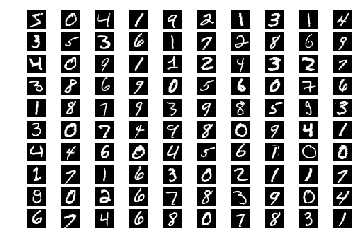

In [4]:
# X_train2 為 60000*28*28 的矩陣
X_train2=X_train.copy()
X_train2=X_train2.reshape(60000,28,28)

# 顯示前 100 筆 Training Data 圖形
for i in range(100):    
    plt.subplot(10,10,i+1),plt.imshow(X_train2[i],cmap = 'gray')
    plt.axis('off')
plt.show()

### 設置神經網路模型參數

In [5]:
# hidden_layer_sizes(50,50) 代表有兩層隱藏層，第一層50個神經元，第二層50個神經元
mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,
                    hidden_layer_sizes=(50,50), random_state=1,
                    max_iter=10,verbose=10,learning_rate_init=.1)

### 標準化 Training Data

In [6]:
# X_train3 為 60000*784 的陣列
X_train3 = X_train.reshape(60000,28*28)
# 將訓練數據標準化
X_train3 = X_train3/255.

# Training Data 的第 1 筆數據
# X_train3[0]

### 訓練模型

In [7]:
# 訓練模型
mlp.fit(X_train3, y_train)

Iteration 1, loss = 0.31433496
Iteration 2, loss = 0.13096526
Iteration 3, loss = 0.09746443
Iteration 4, loss = 0.08289663
Iteration 5, loss = 0.06756179
Iteration 6, loss = 0.06050956
Iteration 7, loss = 0.05404734
Iteration 8, loss = 0.04829666
Iteration 9, loss = 0.04256343
Iteration 10, loss = 0.04180814


/opt/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

### 顯示訓練結果

In [8]:
print ("Training Set Accuracy: %f"% mlp.score(X_train3,y_train))
print ("Test Set Accuracy: %f"% mlp.score(X_test,y_test))
print (mlp.n_layers_) #輸入層+隱藏層+輸出層
print (mlp.out_activation_)

Training Set Accuracy: 0.988583
Test Set Accuracy: 0.963100
4
softmax


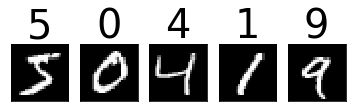

In [9]:
# 第 1-5 筆 Training Data 測試
train_res = mlp.predict(X_train3[:5])
# 顯示圖片與預測值
for i in range(5):
    plt.subplot(2,5,i+1),plt.imshow(X_train2[i],cmap = 'gray')
    plt.title(train_res[i],fontsize=40), plt.xticks([]), plt.yticks([])

### 預測自己輸入的手寫數字圖

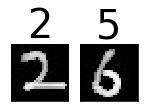

In [10]:
# num:有幾張圖片
num = 2

My_X =np.zeros((num,28*28), dtype=int)
img_num=[0]*num
img_res=[0]*num
#輸入手寫數字圖檔28x28=784 pixel，
Input_Numer=[0]*num
# 圖片檔名
Input_Numer[0]="0.jpg"
Input_Numer[1]="1.jpg"
# Input_Numer[2]="2.jpg"
# Input_Numer[3]="3.jpg"
# Input_Numer[4]="4.jpg"

# 讀取圖片並轉換成陣列
for i in range(num):  #read 20 digits picture
    img = cv2.imread(Input_Numer[i],0)    #Gray
    img_num[i]=img.copy()
    img=img.reshape(My_X.shape[1])
    My_X[i] =img.copy()
    
My_X = My_X/255.
img_res = mlp.predict(My_X)

# 顯示圖片與預測值
for i in range(num):
    plt.subplot(2,5,i+1),plt.imshow(img_num[i],cmap = 'gray')
    plt.title(img_res[i],fontsize=40), plt.xticks([]), plt.yticks([])